In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from numpy import exp,sin,cos,pi
from IPython.display import clear_output 

In [ ]:
!pip install clifford
clear_output()

In [ ]:
from google.colab import files

In [ ]:
import clifford 
from clifford.g3c import *

In [ ]:
R12 = lambda lam : exp(-e12*pi*lam)
R23 = lambda lam : exp(-e23*pi*lam)
R31 = lambda lam : exp(e13*pi*lam)

#Ver 1

In [ ]:
Cube = np.array([
     e1 + e2 + e3,
     e1 - e2 + e3,
    -e1 - e2 + e3,
    -e1 + e2 + e3,
     e1 + e2 - e3,
     e1 - e2 - e3,
    -e1 - e2 - e3,
    -e1 + e2 - e3,
])

M = 9
String = np.arange(1,M+1)*e1
N = 5

StringX1 = String
StringX2 = R12(0.5)*String*~R12(0.5)

StringY1 = R12(0.25)*String*~R12(0.25)
StringY2 = R12(0.75)*String*~R12(0.75)

StringZ1 = R23(0.25)*R12(0.75)*String*~R12(0.75)*~R23(0.25)
StringZ2 = R23(0.75)*R12(0.75)*String*~R12(0.75)*~R23(0.75)

In [ ]:
def draw3d(i,j,RotCube,*RotStrings): 
    """

    i,j : Indices in plot
    RotCube : Rotated cube
    RotStrings : Rot. strings in order +X,-X,+Y,-Y,+Z,-Z

    """

    axs[j,i].set_title(f"$\\lambda$ = {lam:.2f}")

    e1_e2 = np.array([[e1],[e2]]) 
    axs[j,i].plot(*RotCube|e1_e2, marker=".",zs = RotCube|e3, color = "black")

    colors = ["red","red","lime","lime","blue","blue"]
    for k in range(len(RotStrings)):
        axs[j,i].plot(*RotStrings[k]|e1_e2, marker=".",zs = RotStrings[k]|e3,color=colors[k])

    axs[j,i].set_xlim(-M,M)
    axs[j,i].set_ylim(-M,M)
    axs[j,i].set_zlim(-M,M) 

In [ ]:
def S(lam, rotation_axis, string_axis, String):
    '''
    lam : rotation number 0..2
    string_axis : axis on which string is attached e1,e2,e3
    rotation_axis : rotation axis e1,e2,e3
    String : String object
    '''

    ei = string_axis 
    ek = rotation_axis 
    ej = -(ei ^ ek) / e123
    

    lam %= 2

    Rij = lambda lam : exp(-ei^ej*pi*lam)
    Rjk = lambda lam : exp(-ej^ek*pi*lam)


    M = len(String)
    RotString = np.zeros_like(String)
    for a in range(M): #index along the string
            alpha = a / (M-1)

            lambda_ij = (lam      if 0 <= lam and lam < 0.5 else 
                         1 - lam  if 0.5 <= lam <= 1 else
                         lam-1     if 1 < lam <= 1.5 else
                         2-lam) * max(0,1-alpha**3)

            lambda_jk = 0.5*(lam  if 0<=lam and lam < 1 else
                             1-lam) 

            if a:
                RotString[a] = Rjk(lambda_jk) * Rij(lambda_ij) * String[a] * ~Rij(lambda_ij) * ~Rjk(lambda_jk) 
            else:
                RotString[0] = Rij(lam) * String[a] * ~Rij(lam)

    return RotString

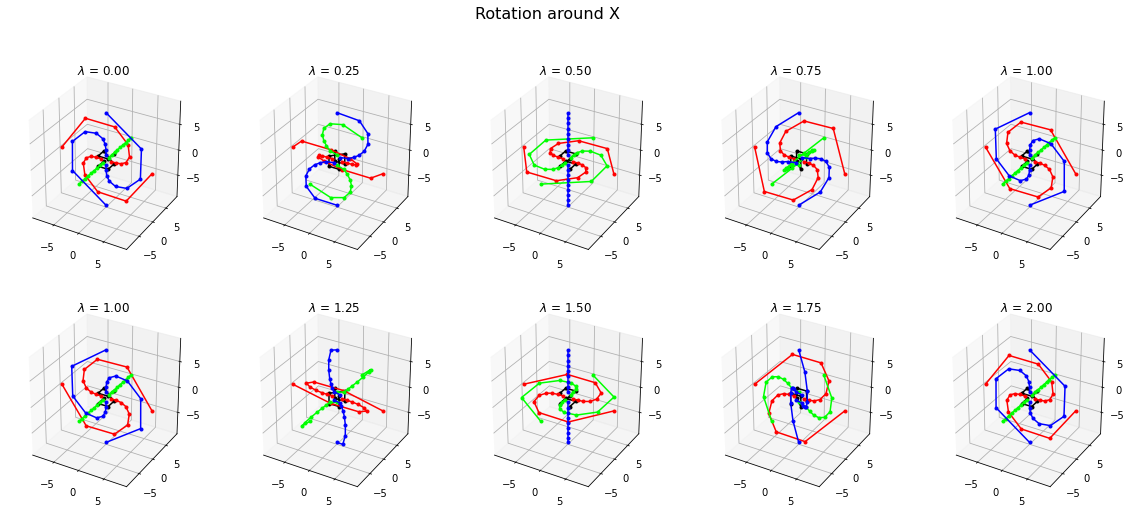

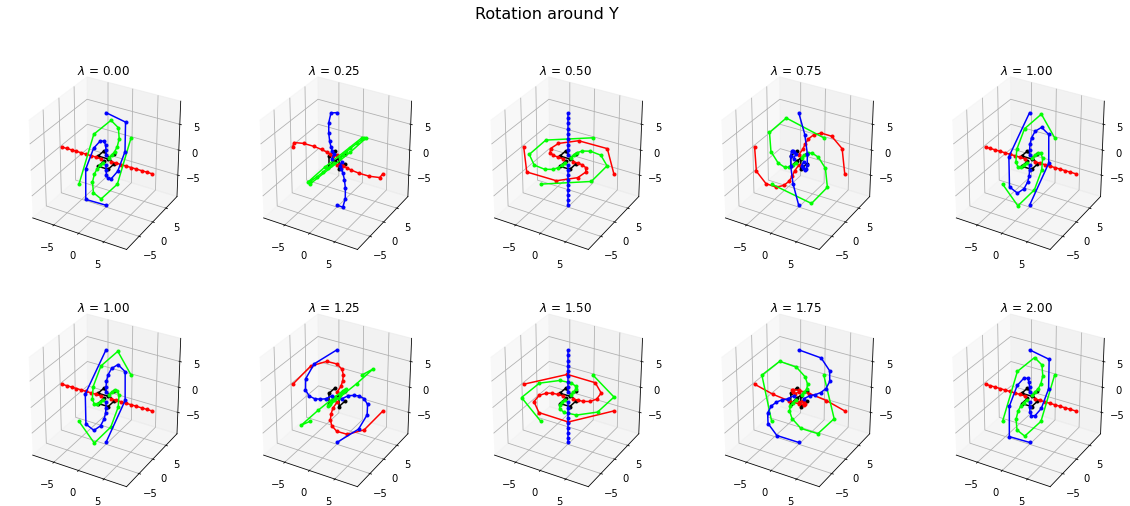

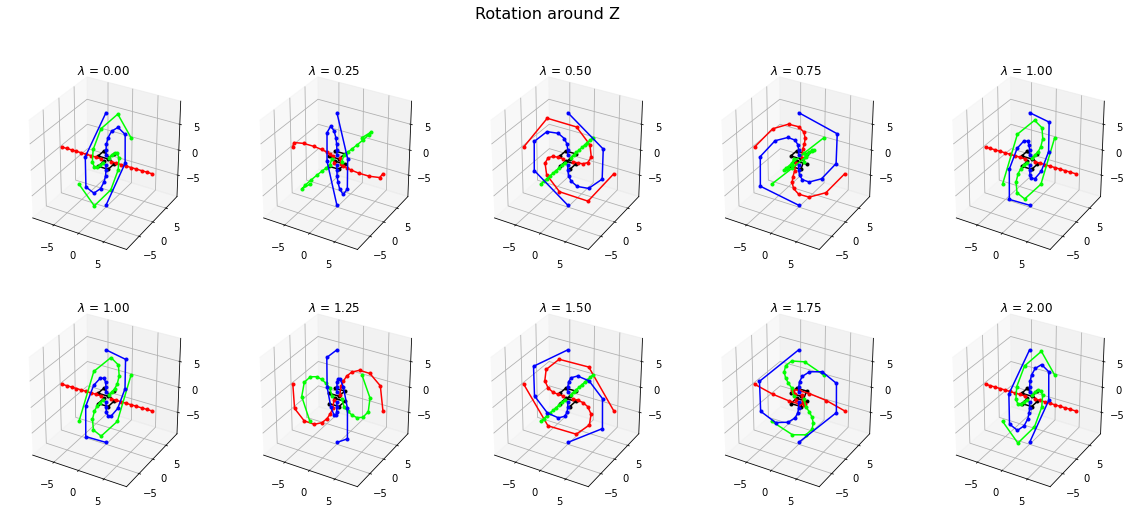

In [ ]:


save = False

plt.rcParams['figure.figsize'] = [4*N, 4*2]
fig, axs = plt.subplots(2,N,subplot_kw=dict(projection='3d'))
fig.suptitle("Rotation around X", fontsize=16)

for j in range(2):
    for i in range(N): #index along the rotation angle
        lam = i / (N-1) + j
        
        rotation_axis = e1

        RotCube = R23(lam) * Cube * ~R23(lam)

        RotStringX1 = R23(0.5*lam)*S(1.5,e3, e1,StringX1)*~R23(0.5*lam)
        RotStringX2 = R23(0.5*lam)*S(0.5,e3,-e1,StringX2)*~R23(0.5*lam)

        RotStringY1 = S(lam+1,rotation_axis, e2,StringY1)
        RotStringY2 = S(lam+0,rotation_axis,-e2,StringY2)

        RotStringZ1 = S(lam+0.5,rotation_axis, e3,StringZ1)
        RotStringZ2 = S(lam+1.5,rotation_axis,-e3,StringZ2)


        
        draw3d(i,j,
               RotCube,
               RotStringX1,RotStringX2,
               RotStringY1,RotStringY2,
            RotStringZ1,RotStringZ2)
        '''
        Face = Poly3DCollection([[4,4,4],[4,-4,4],[4,-4,-4]])
        Face.set_color("lime")
        axs[j,i].add_collection3d(Face, zs=[4,4,-4,])
        '''

if save:
    plt.savefig(r"rot_x.pdf",format="pdf")
    files.download(r"rot_x.pdf")   
plt.show()

plt.rcParams['figure.figsize'] = [4*N, 4*2]
fig, axs = plt.subplots(2,N,subplot_kw=dict(projection='3d'))
fig.suptitle("Rotation around Y", fontsize=16)

for j in range(2):
    for i in range(N): #index along the rotation angle
        lam = i / (N-1) + j

        rotation_axis = e2

        RotCube = R31(lam) * Cube * ~R31(lam)

        RotStringX1 = S(lam+0,rotation_axis, e1,StringX1)
        RotStringX2 = S(lam+1,rotation_axis,-e1,StringX2)

        RotStringY1 = R31(0.5*lam)*S(1.5,e3, e2,StringY1)*~R31(0.5*lam)
        RotStringY2 = R31(0.5*lam)*S(0.5,e3,-e2,StringY2)*~R31(0.5*lam)

        RotStringZ1 = S(lam+0.5,rotation_axis, e3,StringZ1)
        RotStringZ2 = S(lam+1.5,rotation_axis,-e3,StringZ2)
        
        

        draw3d(i,j,
               RotCube,
               RotStringX1,RotStringX2,
               RotStringY1,RotStringY2,
            RotStringZ1,RotStringZ2)

if save:             
    plt.savefig(r"rot_y.pdf",format="pdf")
    files.download(r"rot_y.pdf")         
plt.show()

plt.rcParams['figure.figsize'] = [4*N, 4*2]
fig, axs = plt.subplots(2,N,subplot_kw=dict(projection='3d'))
fig.suptitle("Rotation around Z", fontsize=16)

for j in range(2):
    for i in range(N): #index along the rotation angle
        lam = i / (N-1) + j
        
        rotation_axis = e3

        RotCube = R12(lam) * Cube * ~R12(lam)

        RotStringX1 = S(lam+1,rotation_axis, e1,StringX1)
        RotStringX2 = S(lam+0,rotation_axis,-e1,StringX2)

        RotStringY1 = S(lam+0.5,rotation_axis, e2,StringY1)
        RotStringY2 = S(lam+1.5,rotation_axis,-e2,StringY2)

        RotStringZ1 = R12(0.5*lam)*S(1.5,e2, e3,StringZ1)*~R12(0.5*lam)
        RotStringZ2 = R12(0.5*lam)*S(0.5,e2,-e3,StringZ2)*~R12(0.5*lam)
        
        draw3d(i,j,
               RotCube,
               RotStringX1,RotStringX2,
               RotStringY1,RotStringY2,
            RotStringZ1,RotStringZ2)

if save:
    plt.savefig(r"rot_z.pdf",format="pdf")
    files.download(r"rot_z.pdf") 
plt.show()


#Ver 2, permute rotors to act on states

In [ ]:
class Strings:
    def __init__(self,elems):
        self.vector = elems[0]
        self.beads  = len(elems)

        self.elems = elems

    def s(self, Rotor): #Sandwich product

        return Strings(Rotor*self.elems*~Rotor)


class Cubes:
    def __init__(self,elems):
        
        self.elems = elems

    def s(self, Rotor): #Sandwich product

        return Cubes(Rotor*self.elems*~Rotor)

Cube = Cubes( np.array([
                 e1 + e2 + e3,
                 e1 - e2 + e3,
                -e1 - e2 + e3,
                -e1 + e2 + e3,
                 e1 + e2 - e3,
                 e1 - e2 - e3,
                -e1 - e2 - e3,
                -e1 + e2 - e3,]))
M = 20
spacing = 0.3

String = Strings(spacing*np.arange(2/spacing,M+1)*e1)
N = 5

StringX1 = String
StringX2 = String.s(R12(0.5))

StringY1 = String.s(R12(0.25))
StringY2 = String.s(R12(0.75))

StringZ1 = String.s(R23(0.75)*R12(0.75))
StringZ2 = String.s(R23(0.25)*R12(0.75))

StringList = np.array([[StringX1,StringY1,StringZ1],
                       [StringX2,StringY2,StringZ2]])


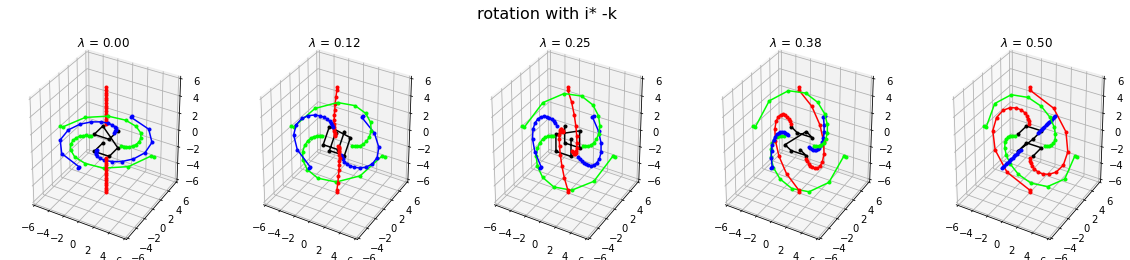

In [ ]:
def W(lam,rotation_axis,string_axis,String):
    '''
    string_axis : axis on which string is attached 1,2,3
    rotation_axis : rotation axis 1,2,3

    returns rotor
    '''

    to_vector = {1 : e1, -1 : -e1,
                 2 : e2, -2 : -e2,
                 3 : e3, -3 : -e3}

    ei = to_vector[string_axis]
    ek = to_vector[rotation_axis]

    ej = -(ei ^ ek) / e123
    

    Rij = lambda lam : exp(-ei^ej*pi*lam)
    Rjk = lambda lam : exp(-ej^ek*pi*lam)


    lam %= 2

    M = len(String.elems)+1
    RotString = np.zeros_like(String.elems)

    a = np.arange(2,M+1) #index along the string
    alpha = a / (M-1)

    lambda_ij = (lam      if 0 <= lam and lam < 0.5 else 
                        1 - lam  if 0.5 <= lam <= 1 else
                        lam-1     if 1 < lam <= 1.5 else
                        2-lam) * np.maximum(1-alpha**3,0)

    lambda_jk = 0.5*(lam  if 0<=lam and lam < 1 else
                            1-lam) 


    RotString = String.s(Rjk(lambda_jk) * Rij(lambda_ij)) 

    return RotString



R = [R23,R31,R12]

def rotors(a,b,lam,StringList):
    '''
    a : quat current state 1,2,3
    b : quat rotation 1,2,3
    lam : rotation number
    StringList : 3-tuple of strings
    '''
    sign = +1
    if a < 0:
        a = -a
        sign = -1

    a -= 1; b -= 1
    a %= 3; b %= 3

    if b == (a+1) % 3:
        c = (a-1) % 3
        StringList = [StringList[a], StringList[b], StringList[c]]

        RotStringList = [W(lam + 1 + (1 if sign<0 else 0), b+1, a+1, StringList[0]), 
                         W(3/2,a+1,b+1,StringList[1]).s(R[b](lam/2+1/4 + (1/2 if sign<0 else 0))),
                         W(lam + 3/2 + (1 if sign<0 else 0), b+1, c+1, StringList[2])]

        
    
    elif b == (a-1) % 3:
        c = (a+1) % 3
        StringList = [StringList[c], StringList[b], StringList[a]]

        RotStringList = [W(lam + 1/2 + (1 if sign<0 else 0), b+1, c+1, StringList[0]), 
                         W(3/2,a+1,b+1,StringList[1]).s(R[b](lam/2+1/4+ (1/2 if sign<0 else 0))),
                         W(lam + 1 + (1 if sign<0 else 0), b+1, a+1, StringList[2])]

        RotStringList = [RotStringList[2], RotStringList[1], RotStringList[0]]

    return RotStringList

to_symbol = {1 : "i", -1 : "-i",
             2 : "j", -2 : "-j",
             3 : "k", -3 : "-k"
             }

plt.rcParams['figure.figsize'] = [4*N, 4]
fig, axs = plt.subplots(1,N,subplot_kw=dict(projection='3d'))


StringList1 = [StringX1,StringY1,StringZ1]
StringList2 = [StringX2,StringY2,StringZ2]


i = 0
a = -3 #state
b = 1 #axis of rot

fig.suptitle(f"rotation with {to_symbol[b]}* {to_symbol[a]}", fontsize=16)

for lam in np.linspace(0,1/2,N):
    #i : index along the rotation angle
    

    RotCube = Cube.s(R[abs(b)-1](lam))


    RotStrings1 = rotors(a,b,lam,StringList1) #pos coor dir
    RotStrings2 = rotors(a,b,lam,StringList2) #neg coor dir



    axs[i].set_title(f"$\\lambda$ = {lam:.2f}")

    e1_e2 = np.array([[e1],[e2]]) 
    axs[i].plot(*RotCube.elems|e1_e2, marker=".",zs = RotCube.elems|e3, color = "black")

    colors = ["red","lime","blue"]
    for k in range(len(RotStrings1)):
        axs[i].plot(*RotStrings1[k].elems|e1_e2, marker=".",zs = RotStrings1[k].elems|e3,color=colors[k])

    for k in range(len(RotStrings2)):
        axs[i].plot(*RotStrings2[k].elems|e1_e2, marker=".",zs = RotStrings2[k].elems|e3,color=colors[k])

    axs[i].set_xlim(-spacing*M,spacing*M)
    axs[i].set_ylim(-spacing*M,spacing*M)
    axs[i].set_zlim(-spacing*M,spacing*M) 

    i += 1

#simplify

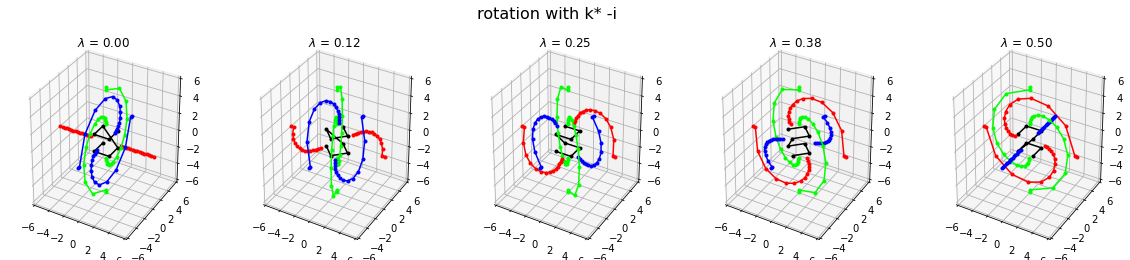

In [ ]:
def rotors(a,b,lam,StringList):
    '''
    a : quat current state 1,2,3
    b : quat rotation 1,2,3
    lam : rotation number
    StringList : 3-tuple of strings
    '''
    sign = +1
    if a < 0:
        a = -a
        sign = -1

    a -= 1; b -= 1
    a %= 3; b %= 3

    if b == (a+1) % 3:
        c = (a-1) % 3
        phase = -1
    else:
        c = (a+1) % 3
        phase = +1

    StringList = [StringList[a], StringList[b], StringList[c]]

    RotStringList = [W(lam + 1 + (1 if sign<0 else 0), b+1, a+1, StringList[0]), 
                     W(3/2,a+1,b+1,StringList[1]).s(R[b](lam/2+1/4 + (1/2 if sign<0 else 0))), 
                     W(lam + phase*1/2 + (1 if sign<0 else 0), b+1, c+1, StringList[2])]
        

    return RotStringList

to_symbol = {1 : "i", -1 : "-i",
             2 : "j", -2 : "-j",
             3 : "k", -3 : "-k"
             }

plt.rcParams['figure.figsize'] = [4*N, 4]
fig, axs = plt.subplots(1,N,subplot_kw=dict(projection='3d'))


StringList1 = [StringX1,StringY1,StringZ1]
StringList2 = [StringX2,StringY2,StringZ2]


i = 0
a = -1 #state
b = 3 #axis of rot

fig.suptitle(f"rotation with {to_symbol[b]}* {to_symbol[a]}", fontsize=16)

for lam in np.linspace(0,1/2,N):
    #i : index along the rotation angle
    

    RotCube = Cube.s(R[abs(b)-1](lam))


    RotStrings1 = rotors(a,b,lam,StringList1) #pos coor dir
    RotStrings2 = rotors(a,b,lam,StringList2) #neg coor dir



    axs[i].set_title(f"$\\lambda$ = {lam:.2f}")

    e1_e2 = np.array([[e1],[e2]]) 
    axs[i].plot(*RotCube.elems|e1_e2, marker=".",zs = RotCube.elems|e3, color = "black")

    colors = ["red","lime","blue"]
    for k in range(len(RotStrings1)):
        axs[i].plot(*RotStrings1[k].elems|e1_e2, marker=".",zs = RotStrings1[k].elems|e3,color=colors[k])

    for k in range(len(RotStrings2)):
        axs[i].plot(*RotStrings2[k].elems|e1_e2, marker=".",zs = RotStrings2[k].elems|e3,color=colors[k])

    axs[i].set_xlim(-spacing*M,spacing*M)
    axs[i].set_ylim(-spacing*M,spacing*M)
    axs[i].set_zlim(-spacing*M,spacing*M) 

    i += 1